In [ ]:
import imageio
from image_utils import display_image
from cube import Cube  # Substitua pelo import correto do seu módulo Cube
import numpy as np
from typing import List

def cubes_to_gif(target_cube, cubes_and_moves, filename="cube_moves", fixedFace=None):
    frames = []
    initial_image = cube.image(150)
    frames.append(initial_image)

    for move in moves:
        cube = Cube(np.zeros((3, 3, 3)), move_history=["x"])
        for move in moves:
            cube.execute([move])
            img = cube.image(150)
            frames.append(img)

    frames = [imageio.imread(frame) if not isinstance(frame, np.ndarray) else frame for frame in frames]
    imageio.mimsave('images/' + filename + '.gif', frames, duration=0.5, loop=0)

def cube_to_gif(target_cube, moves, filename="cube_moves", fixedFace=None):
    cube = Cube(np.zeros((3, 3, 3)), move_history=["x"], fixedFace=fixedFace)
    frames = []
    initial_image = cube.image(150)
    frames.append(initial_image)

    for move in moves:
        cube.execute([move])
        img = cube.image(150)
        frames.append(img)

    frames = [imageio.imread(frame) if not isinstance(frame, np.ndarray) else frame for frame in frames]
    imageio.mimsave('images/' + filename + '.gif', frames, duration=0.5, loop=0)

cube_to_gif(np.zeros((3,3,3)), ["x", "y", "z"], "cube_moves")

from IPython.display import display, Image
with open('images/cube_moves.gif', 'rb') as f:
    display(Image(data=f.read(), format='png'))


In [17]:
import ga 
import cube
import numpy as np

cti = ga.cubesToImage()
args = {
    "population_size": 100,
    "mutation_rate": 0.9,
    "crossover_rate": 0.3,
    "max_generations": 1000,
    "parent_pool_size": 10,
    "parents_number":  4
}

# display(cti.n_cubes_x**2)
gas = np.zeros((cti.n_cubes_x, cti.n_cubes_x), dtype=object)
cubes_and_moves = np.zeros((cti.n_cubes_x, cti.n_cubes_x), dtype=tuple)
for i in range(cti.n_cubes_x):
    for j in range(cti.n_cubes_x):
        gas[i][j] = cube.cube_GA(cti.target_cubes[i][j], **args)
        gas[i][j].run()
        print(gas[i][j].generation, gas[i][j].get_best().fitness)



/Users/marc/Repos/bioinspired/rubik_ga/cube.py:78: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if move_history == []:


1000 0.026057030481809244
1000 0.061946902654867256
1000 0.028515240904621434
1000 0.05211406096361849
1000 0.026057030481809244
1000 0.048180924287118974
1000 0.0752212389380531
1000 0.028515240904621434
1000 0.061455260570304815
1000 0.014257620452310717
1000 0.07374631268436578
1000 0.02359882005899705
1000 0.023107177974434612
1000 0.05014749262536873
144 0.0
1000 0.063913470993117
1000 0.02359882005899705
12 0.0
1000 0.026057030481809244
1000 0.037856440511307765
0 0.0
0 0.0
1000 0.014257620452310717
1000 0.037856440511307765
0 0.0


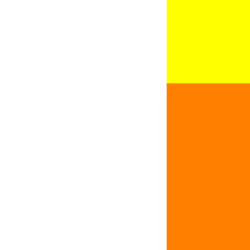

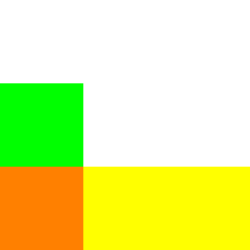

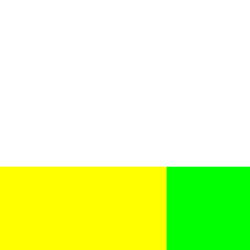

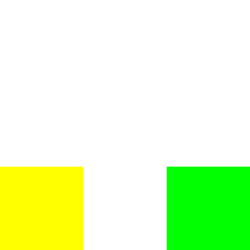

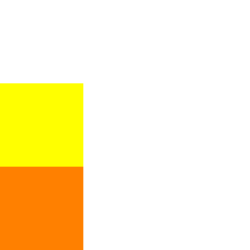

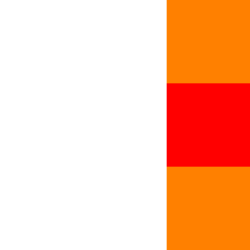

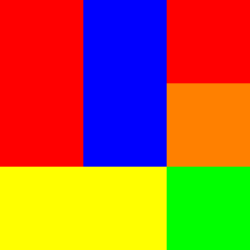

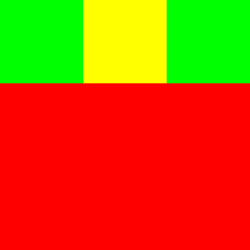

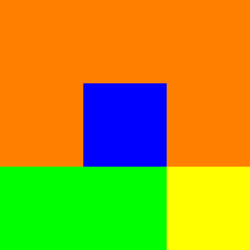

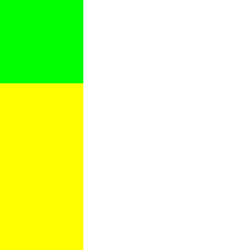

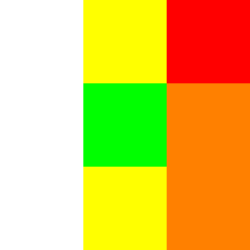

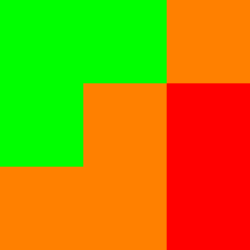

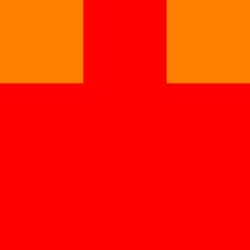

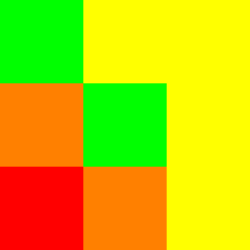

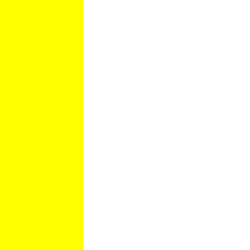

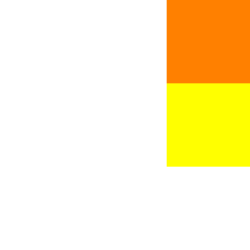

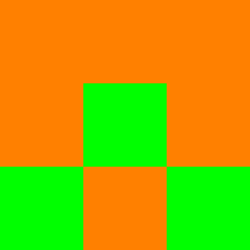

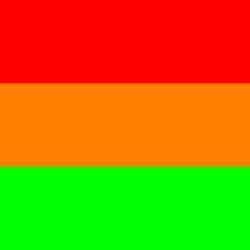

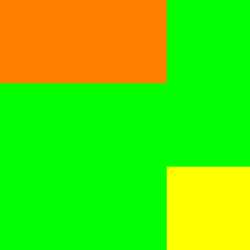

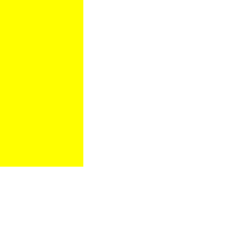

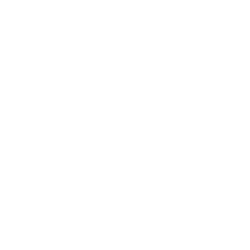

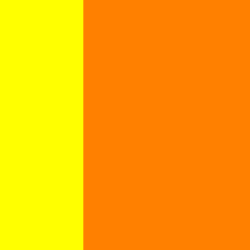

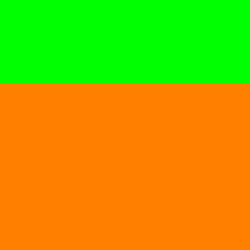

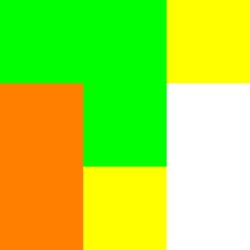

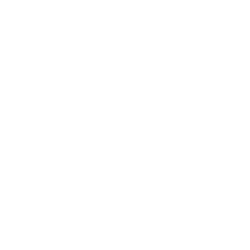

ValueError: could not broadcast input array from shape (3,3,3) into shape (3,3)

In [15]:
final_cubes = np.zeros((cti.n_cubes_x, cti.n_cubes_x, 3, 3, 3), dtype=np.uint8)

from image_utils import *
for i in range(cti.n_cubes_x):
    for j in range(cti.n_cubes_x):
        final_cubes[i][j] = gas[i][j].get_best().image()


cubes_to_image(final_cubes, 2, 1, 150)



display(final_cubes[0][0].shape)
# from image_utils import cubes_to_image, display_image
# cubes_to_image(final_cubes, 1, 1, 150)
# display_image(cubes_to_image(final_cubes, 1, 3, 150))